In [143]:
import pandas as pd
import io
import requests

url="https://github.com/jeonck/pythonPandas/raw/master/titanic.csv"
s=requests.get(url).content
train=pd.read_csv(io.StringIO(s.decode('utf-8')),index_col="PassengerId")

In [144]:
train.shape

(891, 11)

In [145]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt 

# sns.countplot()
# DataFrame의 데이터로 Sex별 생존자 분석 가능  

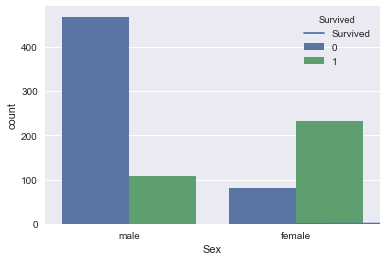

In [147]:
plt.plot(train['Survived'])
sns.countplot(data=train, x="Sex", hue="Survived")

# pivot을 통해서 생존률 계산 가능 : pd.pivot_table()
## pd.pivot_table(df, index="피봇컬럼명", values="표시할 목표값")

In [148]:
pd.pivot_table(train, index="Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


In [152]:
pd.pivot_table(train, index="Sex", values="Fare")

,Fare
Sex,
female,44.479818
male,25.523893


# sns.countplot()
# DataFrame의 데이터로 클래스별 생존자 분석 가능 

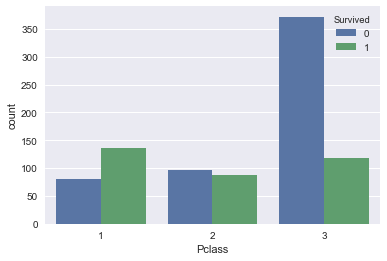

In [153]:
sns.countplot(data=train, x="Pclass", hue="Survived")

위의 plot에서 1등급은 생존자의 수가 많지만, 3등급에서는 사망자의 수가 더 많음 

In [154]:
pd.pivot_table(train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


# 2변수간 상관관계 분석 

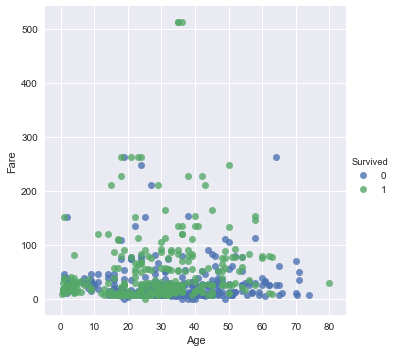

In [155]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [156]:
low_fare = train[train["Fare"]<500]
train.shape, low_fare.shape

((891, 11), (888, 11))

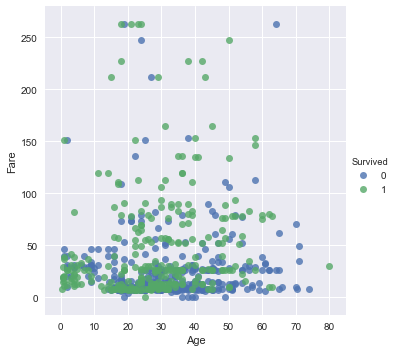

In [157]:
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [158]:
low_low_fare = train[train["Fare"]<100]

In [159]:
train.shape, low_fare.shape, low_low_fare.shape

((891, 11), (888, 11), (838, 11))

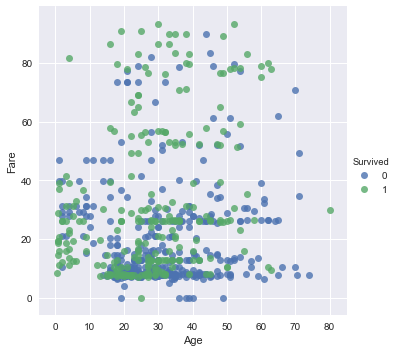

In [160]:
sns.lmplot(data=low_low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

# 특정 컬럼의 데이터를 새로운 데이터로 변환(encode) : df.loc

In [161]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1
train.shape
train[["Sex","Sex_encode"]].head()

,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


# Fare가 null인 데이터 : 아래에서 출력해 보면 해당 데이터는 없음 

In [162]:
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,


In [163]:
train["Fare_fillin"] = train["Fare"]
train[["Fare", "Fare_fillin"]].head()

,Fare,Fare_fillin
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250
4,53.1000,53.1000
5,8.0500,8.0500


# 선착장 탑승에 대해 : 같으면 Tru, 다르면 False

In [164]:
train["Embarked_C"] = (train["Embarked"] == "C")
train["Embarked_S"] = (train["Embarked"] == "S")
train["Embarked_Q"] = (train["Embarked"] == "Q")

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 16)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [165]:
url_t="https://github.com/jeonck/pythonPandas/raw/master/titanic-test.csv"
t=requests.get(url_t).content
test=pd.read_csv(io.StringIO(t.decode('utf-8')),index_col="PassengerId")

In [166]:
test.shape

(418, 10)

In [167]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

In [168]:
test[["Sex","Sex_encode"]].head()

,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


In [169]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [170]:
test["Fare_fillin"] = test["Fare"]

In [171]:
test[["Fare", "Fare_fillin"]].head()

,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


In [172]:
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0
test.loc[test["Fare"].isnull(),["Fare", "Fare_fillin"] ]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


In [173]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Fare_fillin
PassengerId,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0,0.0


# Feature 와 label 

In [174]:
feature_names = ["Pclass", "Sex_encode", "Fare_fillin","Embarked_C", "Embarked_S", "Embarked_Q"]
feature_names

['Pclass',
 'Sex_encode',
 'Fare_fillin',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q']

In [175]:
label_name= "Survived"
label_name

'Survived'

In [205]:
test["Embarked_C"] = (test["Embarked"] == "C")
test["Embarked_S"] = (test["Embarked"] == "S")
test["Embarked_Q"] = (test["Embarked"] == "Q")

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 15)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


In [206]:
X_train= train[feature_names]
X_train.head()

,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0.0,7.2500,False,True,False
2,1,1.0,71.2833,True,False,False
3,3,1.0,7.9250,False,True,False
4,1,1.0,53.1000,False,True,False
5,3,0.0,8.0500,False,True,False


In [207]:
X_train.shape

(891, 6)

In [208]:
X_test= test[feature_names]
X_test.head()

,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
892,3,0.0,7.8292,False,False,True
893,3,1.0,7.0000,False,True,False
894,2,0.0,9.6875,False,False,True
895,3,0.0,8.6625,False,True,False
896,3,1.0,12.2875,False,True,False


In [210]:
X_test.shape

(418, 6)

# 비지도 학습인 Decision Tree 
# feature와 label : feature는 x, label은 y
# 모델 선택 후 학습 : model, fit, model.fit(X, y)

In [211]:
y_train = train[label_name]
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [214]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
model 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [229]:
import graphviz

In [230]:
from sklearn.tree import export_graphviz

In [231]:
dot_tree = export_graphviz(model,feature_names=feature_names, class_names = ["Perish","Survived"],out_file=None)

In [236]:
graphviz.Source(dot_tree)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [234]:
predictions = model.predict(X_test)
predictions.shape

(418,)

In [238]:
predictions[0:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)